In [1]:
import pandas as pd

rA= pd.read_csv('realAll.csv')

rA

,날짜,월,사고수,날씨
0,1,1,62,NaN
1,2,1,96,NaN
2,3,1,102,NaN
3,4,1,100,박무\n연무
4,5,1,95,박무\n연무
...,...,...,...,...
360,27,12,94,연무
361,28,12,94,NaN
362,29,12,78,비\n박무
363,30,12,91,비\n눈\n박무\n연무


In [2]:
rA = rA.replace('(.*)\n(.*)', r'\1 \2', regex=True)
rA

,날짜,월,사고수,날씨
0,1,1,62,NaN
1,2,1,96,NaN
2,3,1,102,NaN
3,4,1,100,박무 연무
4,5,1,95,박무 연무
...,...,...,...,...
360,27,12,94,연무
361,28,12,94,NaN
362,29,12,78,비 박무
363,30,12,91,비 눈 박무 연무


In [3]:
rA.head(10)

,날짜,월,사고수,날씨
0,1,1,62,NaN
1,2,1,96,NaN
2,3,1,102,NaN
3,4,1,100,박무 연무
4,5,1,95,박무 연무
5,6,1,52,NaN
6,7,1,88,연무
7,8,1,111,NaN
8,9,1,99,채운
9,10,1,100,연무


In [4]:
rA = rA.replace('(.*)눈(.*)', r'\1 1\2', regex=True)

In [5]:
rA = rA.replace('(.*)비(.*)', r'\1 2\2', regex=True)

In [57]:
# rA.head(40)

In [9]:
rAnew = rA.replace('[^0-9]', '', regex=True)

In [10]:
rAnew = rAnew.replace('(.*)12(.*)', r'\1 3\2', regex=True)

In [11]:
rAnew = rAnew.replace('(.*)21(.*)', r'\1 3\2', regex=True)

In [12]:
rAnew

,날짜,월,사고수,날씨
0,1,1,62,NaN
1,2,1,96,NaN
2,3,1,102,NaN
3,4,1,100,
4,5,1,95,
...,...,...,...,...
360,27,12,94,
361,28,12,94,NaN
362,29,12,78,2
363,30,12,91,3


In [13]:
rAnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      365 non-null    int64 
 1   월       365 non-null    int64 
 2   사고수     365 non-null    int64 
 3   날씨      235 non-null    object
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [14]:
rAnew = rAnew.replace(' 3', '3', regex=True)

In [15]:
rAnew = rAnew.replace(' ', '', regex=True)

In [16]:
rAnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      365 non-null    int64 
 1   월       365 non-null    int64 
 2   사고수     365 non-null    int64 
 3   날씨      235 non-null    object
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [21]:
snow = rAnew['날씨'] == '1'

a = rAnew[snow]


a

,날짜,월,사고수,날씨
14,15,1,95,1
15,16,1,96,1
16,17,1,103,1
20,21,1,92,1
31,1,2,111,1
42,12,2,94,1
45,15,2,123,1
46,16,2,102,1
50,20,2,88,1
71,13,3,122,1


In [22]:
a.sum()

날짜             165
월               28
사고수           1172
날씨     11111111111
dtype: object

In [18]:
rain = rAnew['날씨'] == '2'

b = rAnew[rain]

b

,날짜,월,사고수,날씨
27,28,1,113,2
32,2,2,69,2
69,11,3,97,2
70,12,3,104,2
72,14,3,105,2
...,...,...,...,...
314,11,11,118,2
316,13,11,118,2
320,17,11,101,2
327,24,11,88,2


In [23]:
b.sum()

날짜                                                  1593
월                                                    629
사고수                                                10034
날씨     2222222222222222222222222222222222222222222222...
dtype: object

In [19]:
rsAll = rAnew['날씨'] == '3'

c = rAnew[rsAll]

c

,날짜,월,사고수,날씨
33,3,2,70,3
37,7,2,90,3
49,19,2,79,3
73,15,3,139,3
81,23,3,128,3
318,15,11,184,3
321,18,11,148,3
363,30,12,91,3


In [24]:
c.sum()

날짜          130
월            46
사고수         929
날씨     33333333
dtype: object

전체 = 39258

날씨 있는 날 사고수 = 25063
날씨 없는 날 사고수 = 14195

2019년은 365일. 
그중 날씨가 있는 날은 235 일
     날씨가 없는 날은 130 일. 

사고는 날씨와 크게 상관이 없다..

### 오히려 

날씨가 있는 날은 106.65 건으로 날씨가 없는 날보다 조금(2.54건 적다). (25063/235)

날씨가 없는 날 사고가 1일에 평균 109.19건  (14195/130)



눈   11일, 사고수 1172번.  
비   93일 사고수 10034번.  
눈비 8일 사고수 929번.     
총 112일 사고수 12135번. 총 108.34 건.

눈이 오는날은 평균 106.54건을 
비가 오는 날은 평균 107.89건 
눈비가 둘다 오는날은 116.12 건으로. 

박무,연무 와 같이 구름낀 날은 123일 사고수는 12928건 평균 105.10 건으로

              
              
구름낀날[105.10] < 눈오는날[106.54] < 날씨가 있는날 전체(ex)눈,비,박무,연무)[106.65]
       < 비가오는날[107.89]  < 날씨없는날[109.19]  <  눈비[116.12]


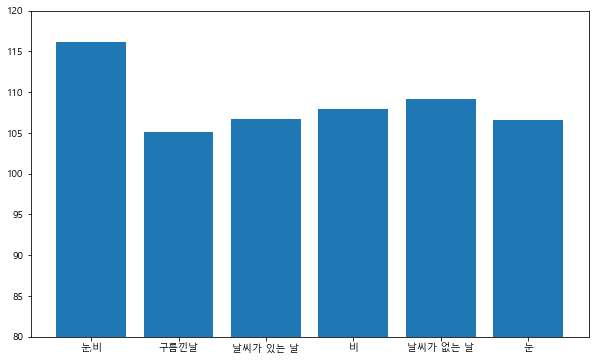

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(10, 6))


x = np.array(['눈,비','구름낀날','날씨가 있는 날','비', '날씨가 없는 날', '눈'])
y = np.array([116.12,105.10,106.65,107.89,109.19,106.54])

plt.ylim([80,120])

plt.bar(x,y)
plt.show()

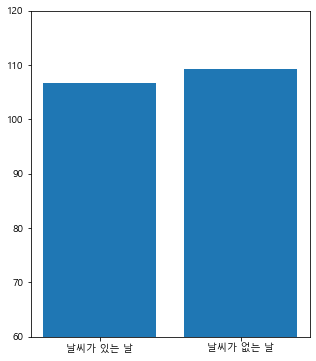

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(5, 6))


x = np.array(['날씨가 있는 날', '날씨가 없는 날'])
y = np.array([106.65,109.19])

plt.ylim([60,120])

plt.bar(x,y)
plt.show()

In [51]:
# 일요일
rAsun = 0

In [52]:
for i in range(52) :
    rAsun = rAsun + (rA['사고수'][(i*7)+5])

In [53]:
rAsun # 확실히 적다.

4336

In [44]:
for i in range(52) :
    print(rA['사고수'][(i*7)+5])

52
71
92
65
70
63
111
74
66
70
80
98
71
104
74
88
80
94
93
106
74
83
74
91
84
67
80
75
80
72
93
91
71
86
85
83
74
97
102
88
82
81
106
88
102
101
88
105
79
81
73
78
